# Assignment 10

*(Due Saturday, November 30, 2019 at noon.)*

In [78]:
#### LOAD PACKAGES 
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

#Graphics settings
%matplotlib inline
sns.set()

In [79]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


1) Create a linear regression model to predict `tips.tip` from the other variables in the `tips` dataset. Print the model's `summary()`.



**Hints:**
1. You'll need to create dummy variables for `Day`, if you use it. `sex`, `time` and `smoker` can just be converted to integer (0 or 1) fields.
2. Try creating a scatterplot matrix (see Seaborn's [`.pairplot()`](https://seaborn.pydata.org/generated/seaborn.pairplot.html) function) to help decide which variables are likely to be useful.

In [80]:
# Add columns that make 'sex', 'smoker', and 'time' binary
tips['sex_male']=(tips.sex=='Male').astype(np.int16)
tips['smoker_true']=(tips.smoker=='Yes').astype(np.int16)
tips['time_dinner']=(tips.time=='Dinner').astype(np.int16)
# Create dummy variables for 'day'
tips = pd.get_dummies(tips, columns=['day'])

In [81]:
tips.head()

,total_bill,tip,sex,smoker,time,size,sex_male,smoker_true,time_dinner,day_Thur,day_Fri,day_Sat,day_Sun
0,16.99,1.01,Female,No,Dinner,2,0,0,1,0,0,0,1
1,10.34,1.66,Male,No,Dinner,3,1,0,1,0,0,0,1
2,21.01,3.50,Male,No,Dinner,3,1,0,1,0,0,0,1
3,23.68,3.31,Male,No,Dinner,2,1,0,1,0,0,0,1
4,24.59,3.61,Female,No,Dinner,4,0,0,1,0,0,0,1


In [64]:
tips.dtypes

total_bill      float64
tip             float64
sex            category
smoker         category
day            category
time           category
size              int64
sex_male          int16
smoker_true       int16
time_dinner       int16
dtype: object

In [84]:
x = sm.add_constant(tips[['total_bill', 'sex_male', 'smoker_true', 'time_dinner', 'size', 'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun']])
y = tips.tip

lmtips = sm.OLS(y, x).fit()
lmtips.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     26.06
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           1.20e-28
Time:                        18:15:09   Log-Likelihood:                -347.48
No. Observations:                 244   AIC:                             713.0
Df Residuals:                     235   BIC:                             744.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.6357      0.294      2.162      0.032       0.056       1.215
total_bill      0.0945      0.010      9.841      0.000       0.076       0.113
sex_male       -0.0324      0.142     -0.229      0.819      -0.311       0.247
smoker_true    -0.0864      0.147     -0.589      0.556      -0.375       0.202
time_dinner    -0.0681      0.445     -0.153      0.878      -0.944       0.808
size            0.1760      0.090      1.966      0.051      -0.000       0.352
day_Thur        0.0740      0.260      0.284      0.776      -0.438       0.586
day_Fri         0.2362      0.208      1.134      0.258      -0.174       0.647
day_Sat         0.1148      0.239      0.481      0.631      -0.355       0.585
day_Sun         0.2107      0.245      0.860      0.390      -0.272       0.693
==============================================================================
Omnibus:                       27.860   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.555
Skew:                           0.607   Prob(JB):                     3.87e-12
Kurtosis:                       4.923   Cond. No.                     1.85e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.43e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

2) Provide a linear function like this one from the class notes:  
    
**Box(Rate, User) = -229.0106 + 54.9285Rate + .4472User**

**Tips(total_bill, sex_male, smoker_true, time_dinner, size, day_Thur, day_Fri, day_Sat, day_Sun) = .6367 + 0.0945total_bill - 0.0324sex_male - 0.0864smoker_True  - 0.0681time_dinner + 0.1760size + 0.0740day_Thur + 0.2362day_Fri + 0.1148day_Sat + 0.2107day_Sun**

3) Provide scatterplots of residuals against each predictor variable and the predicted values.

In [86]:
dir(lmtips)
print("All predictions:", lmtips.predict())

predict = lmtips.get_prediction((1, 10, 400))
print()
print("95% confidence interval:", predict.conf_int(alpha=.05))

predict.summary_frame()

All predictions: [2.73565486 2.25086733 3.25904369 3.33533199 3.80574011 3.83944008
 1.92653073 3.98967441 2.51896426 2.49439764 2.06826124 4.81391647
 2.55486932 3.19125921 2.53156293 3.13690928 2.2823634  2.81306502
 2.90975712 3.12905065 2.69510912 2.95148426 2.524403   5.07856375
 2.87463443 3.03669955 2.26519324 2.20094208 3.05227    2.89101258
 1.90425288 3.08772254 2.45731722 3.34126307 2.68188094 3.45125134
 2.71897704 2.80999993 2.94385612 4.13250265 2.69346555 2.74762281
 2.41502855 2.01251391 4.32226868 2.82604703 3.19832583 4.51124269
 3.97147571 2.80242528 2.28274674 2.10259192 4.77139731 2.03708053
 3.86495157 2.93943144 4.85892875 3.52974474 1.9775276  5.91477376
 2.832635   2.2203592  1.95674046 2.995645   2.83992041 3.07519305
 2.58865416 1.0620177  2.9133741  2.33374361 2.13763578 2.82322811
 3.48585557 3.3365661  2.42613651 1.9949604  2.6087008  3.95126032
 3.17975401 2.66291009 2.77964883 2.60338327 1.83716284 4.03065679
 2.53913211 4.70463712 2.26039544 2.75645222 

ValueError: shapes (1,3) and (10,) not aligned: 3 (dim 1) != 10 (dim 0)

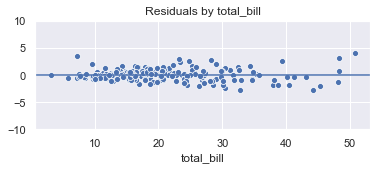

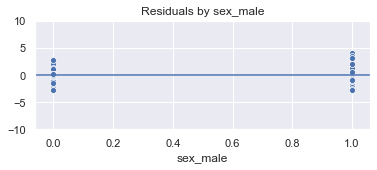

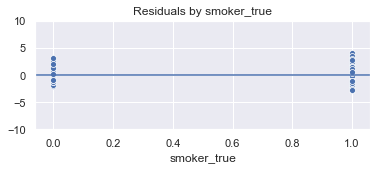

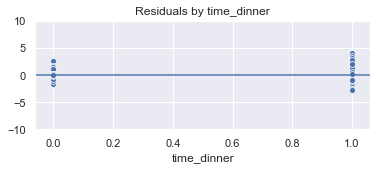

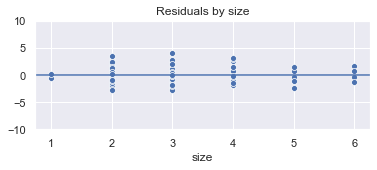

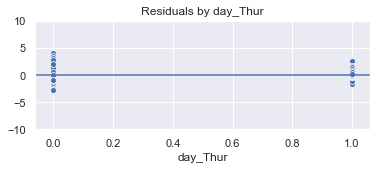

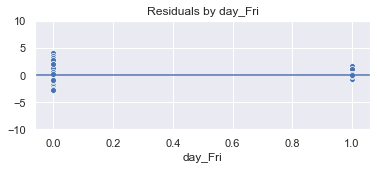

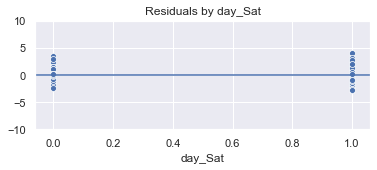

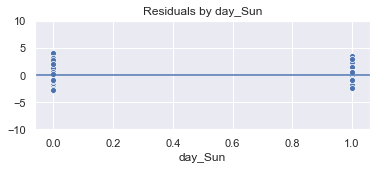

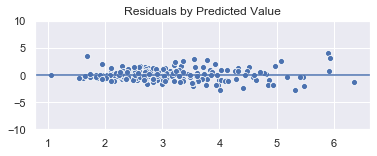

4.133305719547099e-15


In [91]:
for x in ('total_bill', 'sex_male', 'smoker_true', 'time_dinner', 'size', 'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun'):
    plt.figure(figsize=(6,2))
    sns.scatterplot(tips[x], lmtips.resid)
    plt.title("Residuals by %s" % x)
    plt.ylim(-10, 10)
    #Put a horizontal line through the mean of the predictions.
    plt.axhline(np.mean(lmtips.resid))
    plt.show()

plt.figure(figsize=(6,2))
sns.scatterplot(lmtips.predict(), lmtips.resid)
plt.title("Residuals by Predicted Value")
plt.ylim(-10, 10)
plt.axhline(np.mean(lmtips.resid))
plt.show()

print(np.mean(lmtips.resid))

4) Does your model meet the four assumptions expected of a linear model? Explain:

The four assumptions expected of a linear model are met.
The residuals...
1.    have a mean close to zero across the distribution;
2.    have constant variance (the vertical spread of the points remains approximately constant across the graph);
3.    have an approximately normal distribution--points tend to be closer to zero on the y axis, with gradually fewer 
      appearing farther away;
4.    appear independent of one another--they seem to be distributed randomly. You shouldn't see a relationship between
      your input variable(s) and the residuals.
